# Coleta e preparação dos dados das imagens de letras

Primeiro precisamos importar as bibliotecas que iremos utilizar:

In [70]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from typing import Tuple

def crop_image(filename, pixel_value=255):
    gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    crop_rows = gray[~np.all(gray == pixel_value, axis=1), :]
    cropped_image = crop_rows[:, ~np.all(crop_rows == pixel_value, axis=0)]
    return cropped_image

def resize_with_pad(image: np.array, 
                    new_shape: Tuple[int, int], 
                    padding_color: Tuple[int] = (255, 255, 255)):
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    original_shape = (image.shape[1], image.shape[0])
    ratio = float(max(new_shape))/max(original_shape)
    new_size = tuple([int(x*ratio) for x in original_shape])
    image = cv2.resize(image, new_size)
    delta_w = new_shape[0] - new_size[0]
    delta_h = new_shape[1] - new_size[1]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    return image

def zoom(img, zoom_factor=1.2):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)

In [71]:
path_of_the_directory= 'Img/'
file_names = []
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        file_names.append(f)
file_names.sort()

labels = pd.read_csv('english.csv')

In [72]:
image_data = {}
for image in file_names:
    img = zoom(resize_with_pad(image, (100,100)), 1.5)[25:125,25:125]
    #img = crop_image(image) # The image pixels have range [0, 255]
    #resized = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
    img_list = np.array(img.tolist()).flatten() # We have a list of lists of pixellens
    image_data[image] = img_list

df = pd.DataFrame(image_data).T

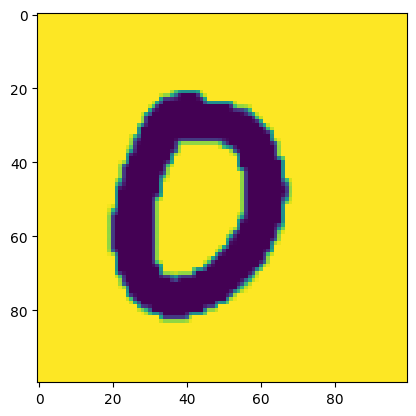

In [73]:
data = df.copy()
plt.imshow(data.values[1].reshape(100,100));

In [74]:
df_0 = df.reset_index()
df_0.rename(columns={'index':'image'}, inplace=True)
labelled_data = labels.merge(df_0, how='inner', on='image')

In [77]:
labelled_data.drop(columns='image', inplace=True)
labelled_data.to_csv('letter_data.csv')